<a href="https://colab.research.google.com/github/Chaudhary-Aakash/DeepLearning/blob/master/Final_year_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#!pip install q keras==2.2.4
#!pip install tensorflow==1.14.0
#!pip install tensorflow-gpu==1.14.0


In [2]:
import keras
print(keras.__version__)
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Using TensorFlow backend.


2.3.1
Found GPU at: /device:GPU:0


In [4]:
from __future__ import print_function
import numpy as np # For numerical fast numerical calculations
import matplotlib.pyplot as plt # For making plots
import pandas as pd # Deals with data
import seaborn as sns # Makes beautiful plots
import keras 
import sys 
from pandas import pandas as pd
#import category_encoders as ce
import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os
import glob
import numpy as np
import scipy as sp
import pandas as pd
# skimage
from skimage.io import imshow, imread, imsave
from skimage.transform import rotate, AffineTransform, warp,rescale, resize, downscale_local_mean
from skimage import color,data
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
# imgaug
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
# Albumentations
import albumentations as A 
# Keras
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
#visualisation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib inline
import seaborn as sns
from IPython.display import HTML, Image
import cv2
import os
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

# load data

p_train=pd.read_csv('/content/drive/My Drive/plant-pathology-2020-fgvc7/train.csv')
p_test=pd.read_csv('/content/drive/My Drive/plant-pathology-2020-fgvc7/test.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
target = p_train[['healthy', 'multiple_diseases', 'rust', 'scab']]
test_ids = p_test['image_id']

img_size=224

0    1305
1     516
Name: healthy, dtype: int64

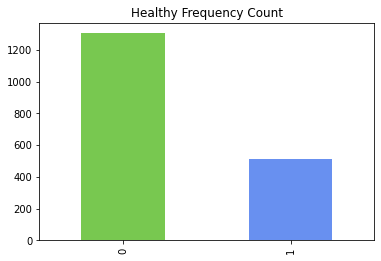

In [8]:
colors=['#78C850','#6890F0']
p_train['healthy'].value_counts().plot(kind='bar',title='Healthy Frequency Count',color=colors)
p_train['healthy'].value_counts()

Train Shape: (1821, 224, 224, 3)
Test Shape: (1821, 224, 224, 3)


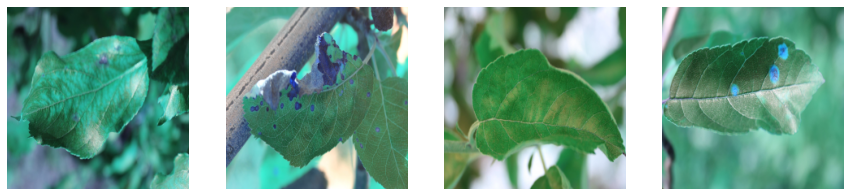

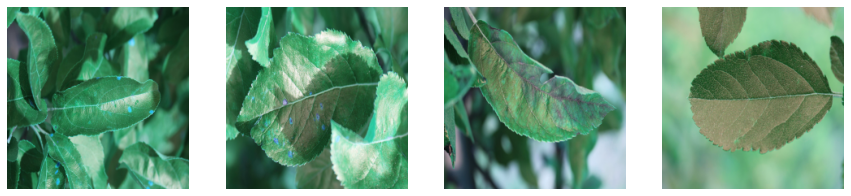

In [9]:
train_image=[]
for name in p_train['image_id']:
    path='/content/drive/My Drive/plant-pathology-2020-fgvc7/images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    train_image.append(image)

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
for i in range(4):
    ax[i].set_axis_off()
    ax[i].imshow(train_image[i])
    
    
test_image=[]
for name in p_test['image_id']:
    path='/content/drive/My Drive/plant-pathology-2020-fgvc7/images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    test_image.append(image)
fig, ax = plt.subplots(1, 4, figsize=(15, 15))
for i in range(4):
    ax[i].set_axis_off()
    ax[i].imshow(test_image[i])    

from keras.preprocessing.image import img_to_array

x_train = np.ndarray(shape=(len(train_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in train_image:
    x_train[i]=img_to_array(image)
    x_train[i]=train_image[i]
    i=i+1
x_train=x_train/255
print('Train Shape: {}'.format(x_train.shape))

x_test = np.ndarray(shape=(len(test_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in test_image:
    x_test[i]=img_to_array(image)
    x_test[i]=test_image[i]
    i=i+1
    
x_test=x_test/255
print('Test Shape: {}'.format(x_test.shape))

In [10]:
y = p_train.copy()
del y['image_id']
y.head()

y_train = np.array(y.values)
print(y_train.shape,y_train[0])

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

(1821, 4) [0 0 0 1]


((1456, 224, 224, 3), (365, 224, 224, 3), (1456, 4), (365, 4))

In [11]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 115) 
 
x_train, y_train = sm.fit_resample(x_train.reshape((-1, img_size * img_size * 3)), y_train)
x_train = x_train.reshape((-1, img_size, img_size, 3))
x_train.shape, y_train.sum(axis=0)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

((1960, 224, 224, 3), array([490, 490, 490, 490]))

In [0]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
LR_reduce=ReduceLROnPlateau(monitor='val_accuracy',
                            factor=.5,
                            patience=10,
                            min_lr=.000001,
                            verbose=1)

ES_monitor=EarlyStopping(monitor='val_loss',
                          patience=20)

reg = .0005

In [13]:
from keras.models import Model, Sequential, load_model, Input
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.regularizers import l2
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras import optimizers

model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5),activation='relu', input_shape=(img_size, img_size, 3), kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(128, kernel_size=(5,5),activation='relu', kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))

model.add(Conv2D(32, kernel_size=(3,3),activation='relu', kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))


model.add(Conv2D(128, kernel_size=(5,5),activation='relu', kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(512, kernel_size=(5,5),activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))

model.add(Conv2D(128, kernel_size=(3,3),activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Dropout(.25))
model.add(Dense(200,activation='relu'))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Dropout(.25))
model.add(Dense(100,activation='relu'))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Dropout(.25))
model.add(Dense(4,activation='softmax'))

model.summary()

from keras.preprocessing.image import ImageDataGenerator

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 32)      2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 32)      96        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 128)     102528    
_________________________________________________________________
batch_normalization_2 (Batch (None, 216, 216, 128)     384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 108, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 108, 108, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 32)     

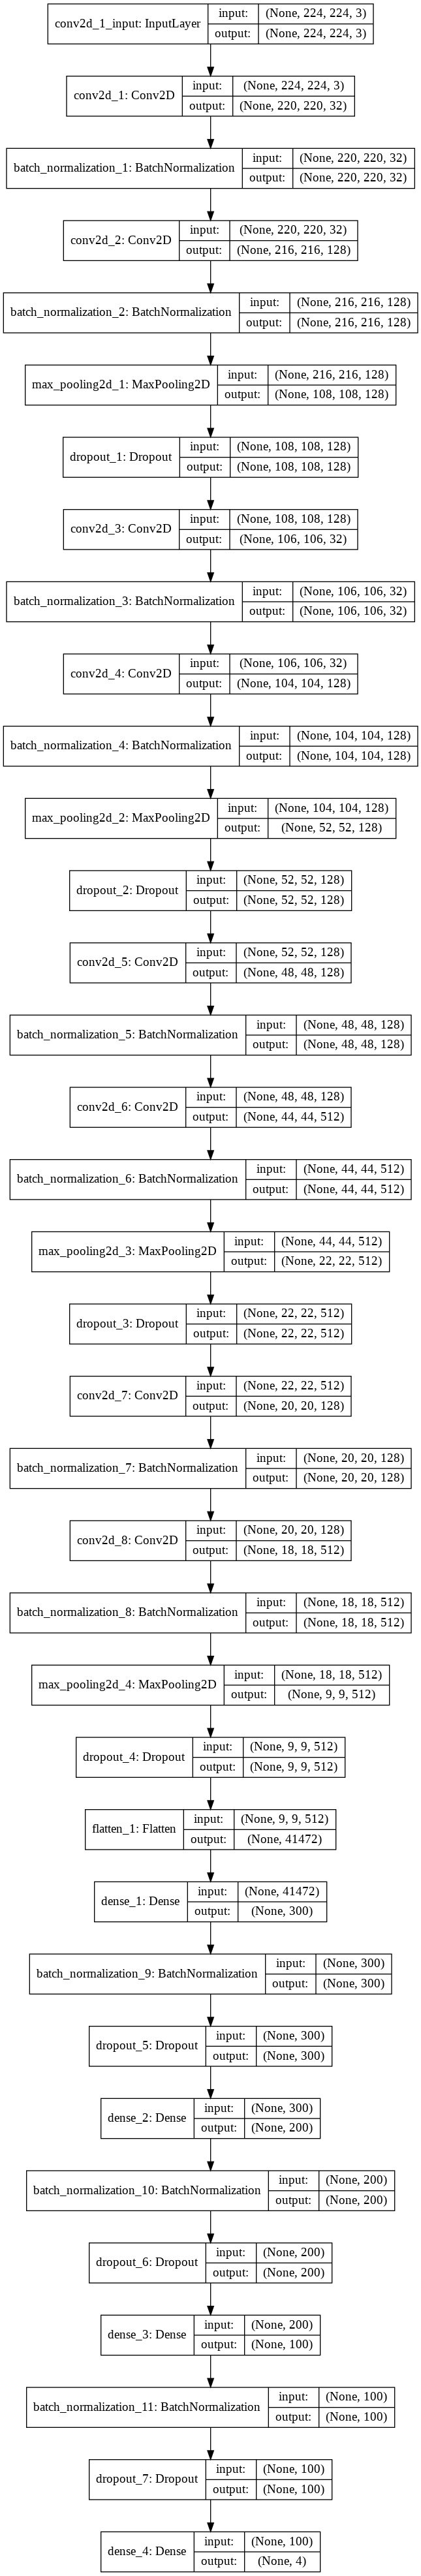

In [14]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [17]:
datagen = ImageDataGenerator(rotation_range=45,
                             shear_range=.25,
                              zoom_range=.25,
                              width_shift_range=.25,
                              height_shift_range=.25,
                              rescale=1/255,
                              brightness_range=[.5,1.5],
                              horizontal_flip=True,
                              vertical_flip=True,
                              fill_mode='nearest'
#                              featurewise_center=True,
#                              samplewise_center=True,
#                              featurewise_std_normalization=True,
#                              samplewise_std_normalization=True,
#                              zca_whitening=True
                              )

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                              epochs=50,
                              steps_per_epoch=x_train.shape[0] // 32,
                              verbose=1,
                              callbacks=[ES_monitor,LR_reduce],
                              validation_data=datagen.flow(x_val, y_val,batch_size=32),
                              validation_steps=x_val.shape[0]//32
                              )

Epoch 1/50
61/61 [==============================] - 35s 573ms/step - loss: 0.9261 - accuracy: 0.6240 - val_loss: 1.0433 - val_accuracy: 0.5597
Epoch 2/50
61/61 [==============================] - 34s 560ms/step - loss: 0.9437 - accuracy: 0.6250 - val_loss: 1.1213 - val_accuracy: 0.5255
Epoch 3/50
61/61 [==============================] - 34s 562ms/step - loss: 0.8677 - accuracy: 0.6691 - val_loss: 0.8242 - val_accuracy: 0.6366
Epoch 4/50
61/61 [==============================] - 34s 561ms/step - loss: 0.8113 - accuracy: 0.7038 - val_loss: 0.6427 - val_accuracy: 0.7688
Epoch 5/50
61/61 [==============================] - 34s 563ms/step - loss: 0.7811 - accuracy: 0.7272 - val_loss: 0.6279 - val_accuracy: 0.7598
Epoch 6/50
61/61 [==============================] - 34s 561ms/step - loss: 0.8105 - accuracy: 0.7199 - val_loss: 0.8627 - val_accuracy: 0.6697
Epoch 7/50
61/61 [==============================] - 34s 559ms/step - loss: 0.7877 - accuracy: 0.7293 - val_loss: 0.5855 - val_accuracy: 0.8198

In [0]:
import json

# lets assume `model` is main model 
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights("model_im.h5")



In [0]:
from keras.models import load_model
from keras.models import model_from_json
import json

with open('model_json.json','r') as f:
    model_json = json.load(f)

model = model_from_json(model_json)
model.load_weights('model_im.h5')


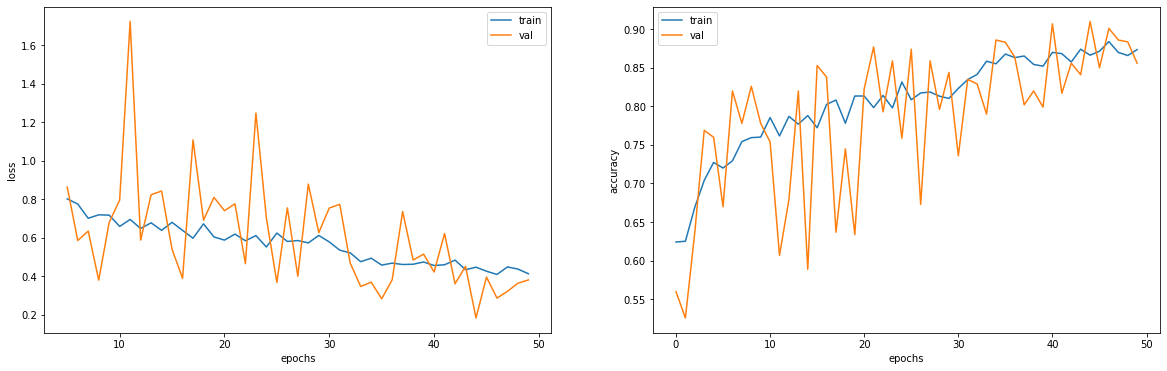

0.993
0.912
0.998
0.991
totally:0.973


In [20]:
from matplotlib import pyplot as plt

h = history.history

offset = 5
epochs = range(offset, len(h['loss']))

plt.figure(1, figsize=(20, 6))

plt.subplot(121)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, h['loss'][offset:], label='train')
plt.plot(epochs, h['val_loss'][offset:], label='val')
plt.legend()

plt.subplot(122)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(h[f'accuracy'], label='train')
plt.plot(h[f'val_accuracy'], label='val')
plt.legend()

plt.show()

from sklearn.metrics import roc_auc_score

pred_test = model.predict(x_val)
roc_sum = 0
for i in range(4):
    score = roc_auc_score(y_val[:, i], pred_test[:, i])
    roc_sum += score
    print(f'{score:.3f}')

roc_sum /= 4
print(f'totally:{roc_sum:.3f}')

In [21]:
pred = model.predict(x_test)

res = pd.DataFrame()
res['image_id'] = test_ids
res['healthy'] = pred[:, 0]
res['multiple_diseases'] = pred[:, 1]
res['rust'] = pred[:, 2]
res['scab'] = pred[:, 3]
res.to_csv('submission.csv', index=False)
res.head(10)

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.009000,0.050324,0.933674,0.007002
1,Test_1,0.027699,0.300197,0.636636,0.035468
2,Test_2,0.343268,0.031073,0.003724,0.621935
3,Test_3,0.858123,0.028123,0.006432,0.107322
4,Test_4,0.004325,0.041712,0.948351,0.005612
5,Test_5,0.443798,0.081711,0.007009,0.467482
6,Test_6,0.960162,0.001440,0.009733,0.028665
7,Test_7,0.012027,0.020836,0.000867,0.966270
8,Test_8,0.278023,0.164883,0.008148,0.548947
9,Test_9,0.023521,0.025074,0.938785,0.012620
